Student Name: Frank Oyugi  
Supervisor: Maryann Mwikali  
Student pace: Full Time Hybrid

## Overview

The telecommunication sector is a dynamic industry characterized by network infrastructure,technological innovation and global connectivity.However,customers may switch from one telecommunication service to another or they may discontinue the service altogether,a phenomenon called 'Telecom churn'.Telecom churn analysis is a crucial aspect of business intelligence for telecommunication companies as it helps them understand why customers are leaving and what actions can be taken to reduce churn rates.In this project,we are looking to provide predictive and actionable insights regarding likely churn candidates at the telecommunications company SyriaTel. We hope to create a complex model that can predict likely churn candidates as well as the features that impact churn the most.


## Business Understanding

The primary goal of this project is to to unlock actionable insights that will empower SyriaTel to implement targeted strategies to mitigate customer churn, ultimately fostering long-term business sustainability.To achieve this objective we need to develop a model that can identify the key factors influencing telecom churn. To effectively train this model, the client requires precise and representative data related to the customers of this telecommunications company.  
Once trained the model will be capable of providing accurate predictions on whether customers will churn or not.  
#### Research Questions  
1.Which features of the SyriaTel dataset are the most significant predictors of customer churn?  
2.How do various models differ in their ability to predict customer churn?  
3.How can SyriaTel mitigate customer churn?


## Data Understanding

The dataset used in this project was sourced from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).  
The columns that have been used in the dataset are:
- state:The state the customer lives in.
- account length:The number of days a customer has had an account.
- phone number: the phone number of the customer.
- international plan: true if the customer has the international plan, otherwise false.
- voice mail plan: true if the customer has the voice mail plan, otherwise false.
- number vmail messages: the number of voicemails the customer has sent.
- total day minutes: total number of minutes the customer has been in calls during the day.
- total day calls: total number of calls the user has done during the day.
- total day charge: total amount of money the customer was charged by the Telecom company for calls during the day.
- total eve minutes: total number of minutes the customer has been in calls during the evening.
- total eve calls: total number of calls the customer has done during the evening.
- total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening.
- total night minutes: total number of minutes the customer has been in calls during the night.
- total night calls: total number of calls the customer has done during the night.
- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night.
- total intl minutes: total number of minutes the user has been in international calls.
- total intl calls: total number of international calls the customer has done.
- total intl charge: total amount of money the customer was charged by the Telecom company for international calls.
- customer service calls: number of calls the customer has made to customer service.
- churn: true if the customer terminated their contract, otherwise false.

### Libraries and Modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Preparation

We start by loading the dataset.

In [2]:
df = pd.read_csv('telcom-churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
print(df.shape)


(3333, 21)


In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We can drop columns which do not provide information which is necessary.In this case we can drop the following columns:  
- Phone Number.
- Number of voice mail messages.
- Area code.

In [7]:
df = df.drop(['phone number','number vmail messages','area code'],axis=1)

In [8]:
df.head()

,state,account length,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Null Values

In [9]:
df.isna().sum()

state                     0
account length            0
international plan        0
voice mail plan           0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values in the dataset.

#### Duplicates

In [10]:
df.duplicated().sum()

0

This dataset has no duplicates.

## Exploratory Data Analysis

### List Of Columns

In [11]:
columns_list = df.columns.tolist()
for column_name in columns_list:
    print(column_name)

state
account length
international plan
voice mail plan
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


### List Of Numerical Columns

In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
columns_to_exclude = ['state','international plan','voice mail plan','churn']

for column_to_exclude in columns_to_exclude:
    if column_to_exclude in numerical_columns:
        numerical_columns.remove(column_to_exclude)
print(numerical_columns)

['account length', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


### Categorical Data Analysis

Categorical data is data that represents groups or categories.They are often represented using labels or strings rather than numerical values.Analyzing categorical data involves summarizing the frequency,comparing distributions and identifying patterns or associations.We can analyze categorical data using bar charts,which are graphical representations which display the frequency,proportion or count of each category using rectangular bars.We can also show how categorical variables relate to numerical variables using bar charts.In this dataset,we can see'state','international plan','voice mail plan' and 'churn' as the columns representing categorical data.

In [13]:
categorical_columns=['international plan','voice mail plan','churn']


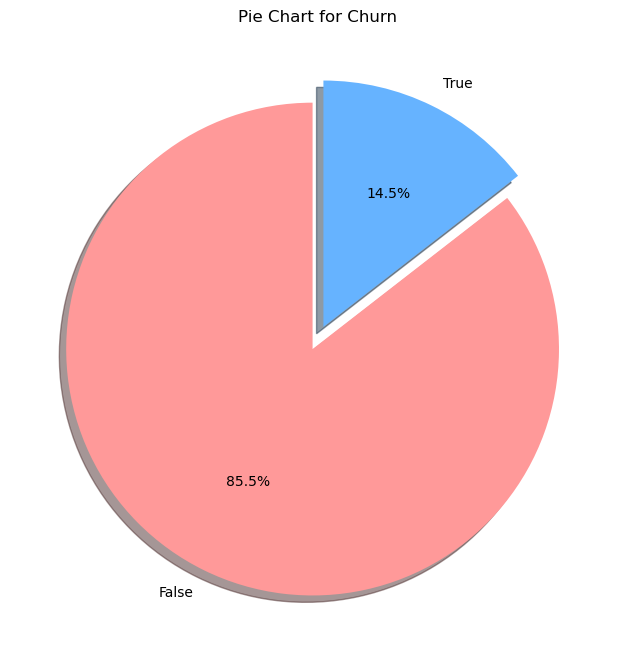

In [14]:
# To get a pie chart to analyze 'Churn' 
df['churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', startangle=90,colors=['#ff9999','#66b3ff'], shadow=True, figsize=(8,8))
plt.ylabel('')
plt.title('Pie Chart for Churn')
plt.show()

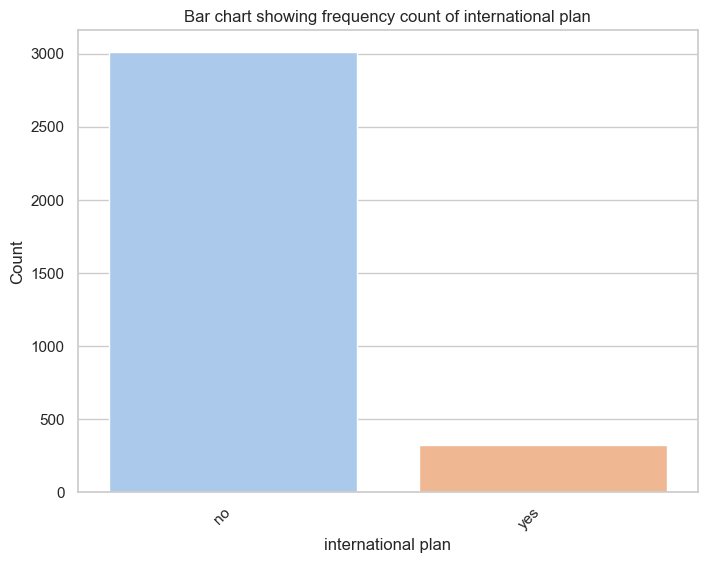

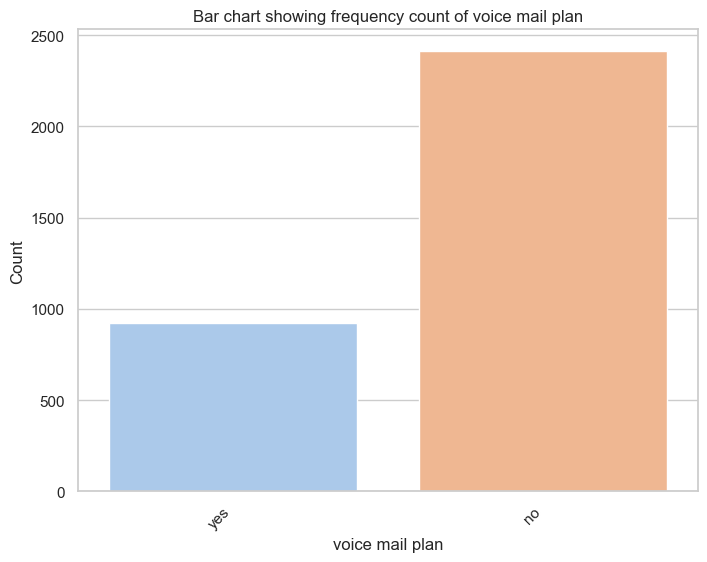

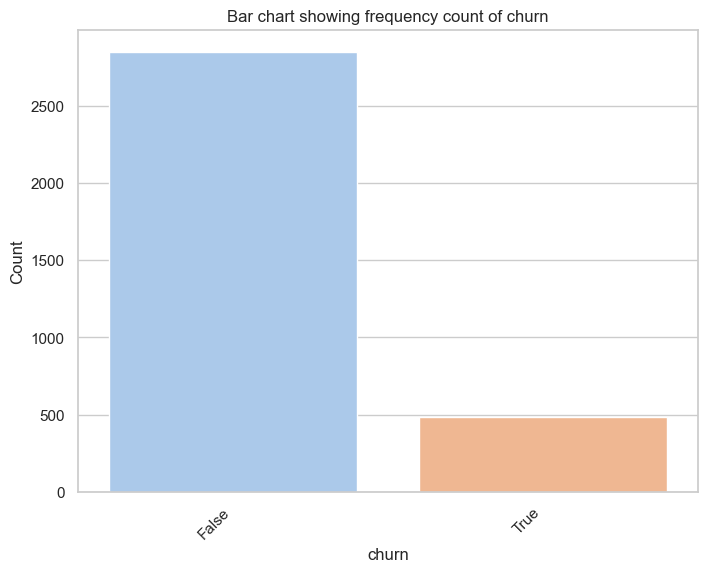

In [15]:
#Set the Style
sns.set(style="whitegrid")

# Iterate over each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    
    # create the bar chart
    sns.countplot(x=column, data=df, palette="pastel")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar chart showing frequency count of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Looking at the pie chart and bar plots above,we can make some observations:
- 85% of the customers moves to another service or discontinued their service altogether.
- Most customers have neither a voice mail plan nor an international plan.

### Realtionship Between Churn and International Plan/Voice Mail Plan

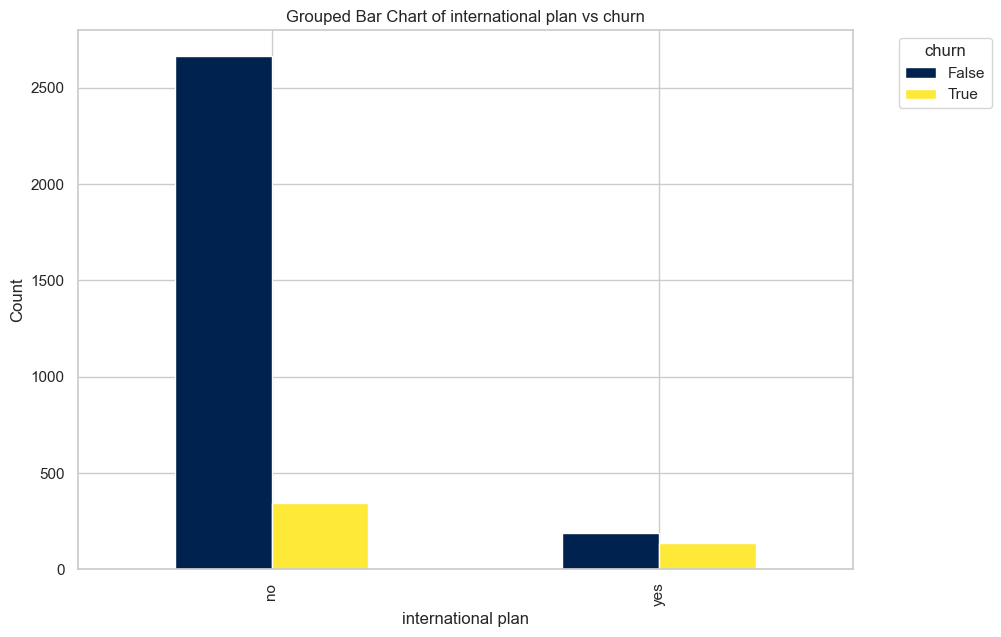

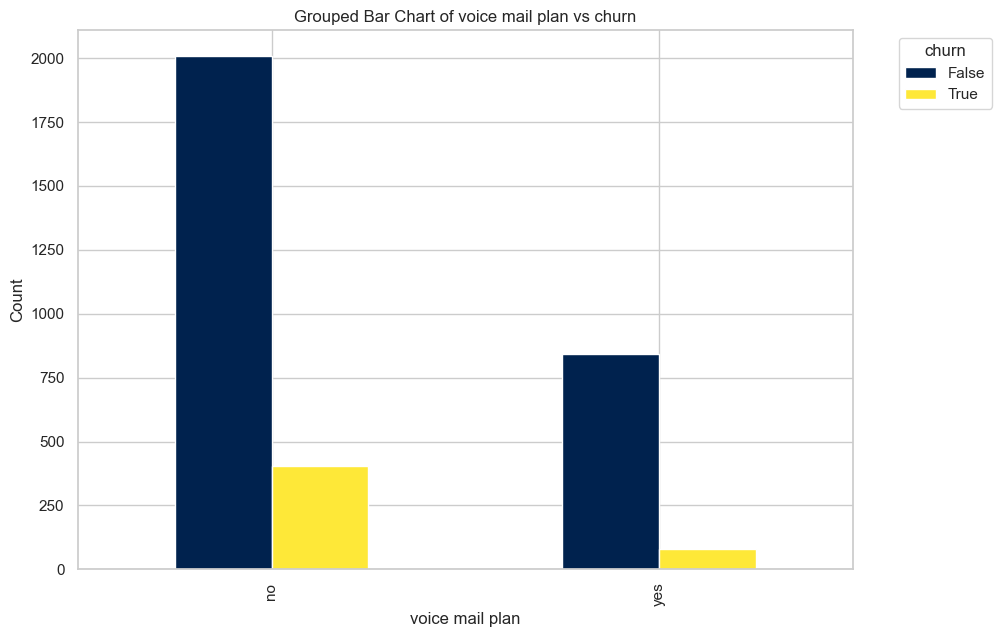

In [16]:
categorical_pairs = [('international plan', 'churn'), ('voice mail plan', 'churn')]

for category1, category2 in categorical_pairs:
    crosstab = pd.crosstab(df[category1], df[category2])
    crosstab.plot(kind='bar', figsize=(10, 7), colormap='cividis')
    
    plt.title(f'Grouped Bar Chart of {category1} vs {category2}')
    plt.xlabel(category1)
    plt.ylabel('Count')
    plt.legend(title=category2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

From these two countplots,we can observe that most customers who have either a voice mail plan or not or an international plan or not,have churned,which is consistent with the pie chart showing that 85% of the customers have churned.

### Analysis Of Numbers By State

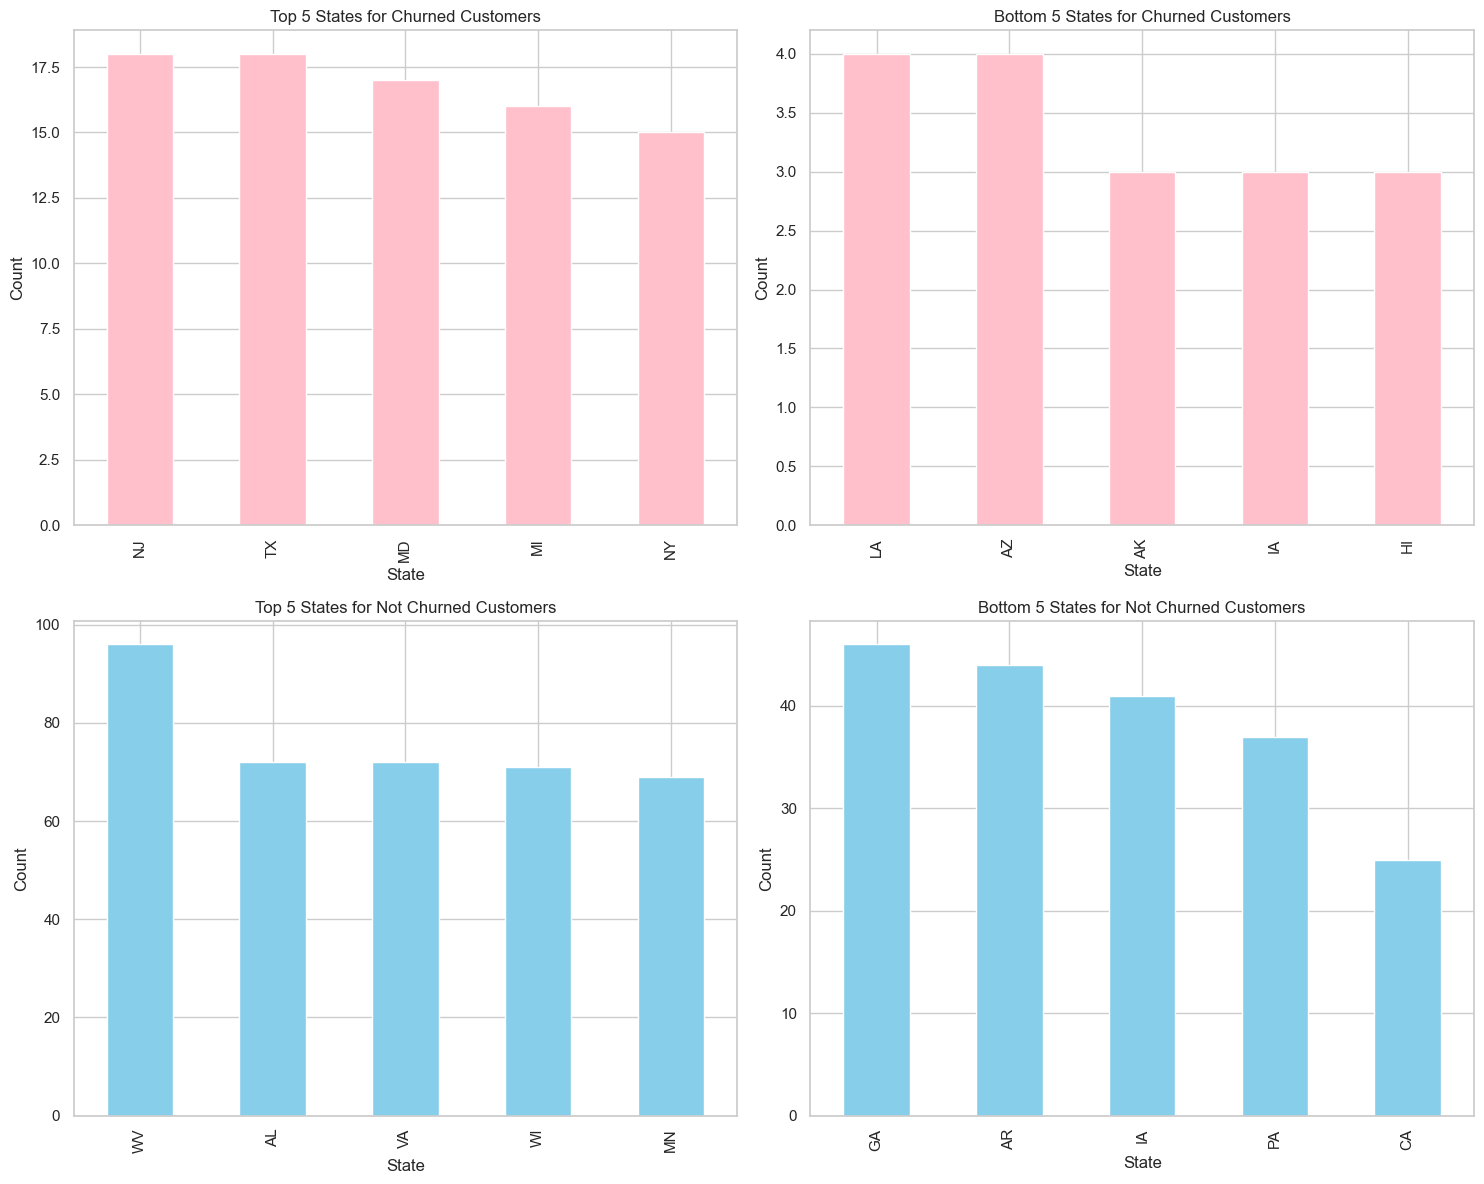

In [17]:
# Separate the data into churned and not churned
churned = df[df['churn'] == 1]
not_churned = df[df['churn'] == 0]

# Count occurrences of each state for churned and not churned
churned_counts = churned['state'].value_counts()
not_churned_counts = not_churned['state'].value_counts()

# Get top 5 and bottom 5 states for churned customers
top_5_churned = churned_counts.head(5)
bottom_5_churned = churned_counts.tail(5)

# Get top 5 and bottom 5 states for not churned customers
top_5_not_churned = not_churned_counts.head(5)
bottom_5_not_churned = not_churned_counts.tail(5)

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Top 5 churned
top_5_churned.plot(kind='bar', ax=axs[0, 0], color='pink')
axs[0, 0].set_title('Top 5 States for Churned Customers')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Count')

# Bottom 5 churned
bottom_5_churned.plot(kind='bar', ax=axs[0, 1], color='pink')
axs[0, 1].set_title('Bottom 5 States for Churned Customers')
axs[0, 1].set_xlabel('State')
axs[0, 1].set_ylabel('Count')

# Top 5 not churned
top_5_not_churned.plot(kind='bar', ax=axs[1, 0], color='skyblue')
axs[1, 0].set_title('Top 5 States for Not Churned Customers')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Count')

# Bottom 5 not churned
bottom_5_not_churned.plot(kind='bar', ax=axs[1, 1], color='skyblue')
axs[1, 1].set_title('Bottom 5 States for Not Churned Customers')
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

From the 4 bar plots above,we can deduce the following:
- The states with the highest number of churned customers are (New Jersey,Texas,Maryland,Michigan,New York).
- The states with the lowest number of churned customers are (Louisiana,Arizona,Alaska,Iowa,Hawaii).
- The states with the highest number of non-churned customers are (West Virginia,Alabama,Virginia,Wisconsin,Minnesota).
- The states with the lowest number of non-churned customers are (Georgia,Arkansas,Iowa,Pennyslavania,California).

### Numerical Data Analysis

### Correlation Heatmap

In [18]:
corr_mat =df[numerical_columns].corr()
corr_mat

,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
total day minutes,0.006216,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,-0.013176,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802
total night charge,-0.008960,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277


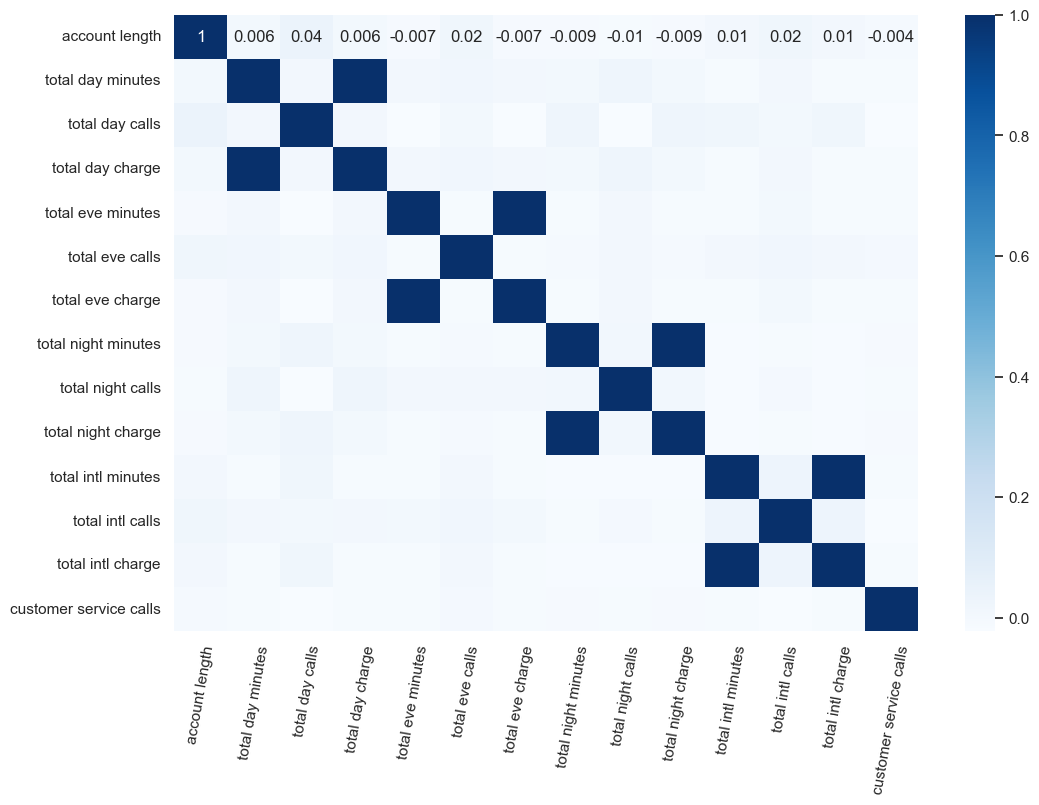

In [19]:
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='Blues', fmt='.0g'); 
plt.xticks(rotation=80);
plt.yticks(rotation=0);

From the heatmap we can see that:
- Total day minutes and total day charge are fully positively correlated.
- Total night minutes and total night charge are fully positively correlated.
- Total int'l minutes and total int'l charge are fully positively correlated.
- Total eve minutes and total eve charge are fully positively correlated.

### Frequency Distribution Of Calls

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

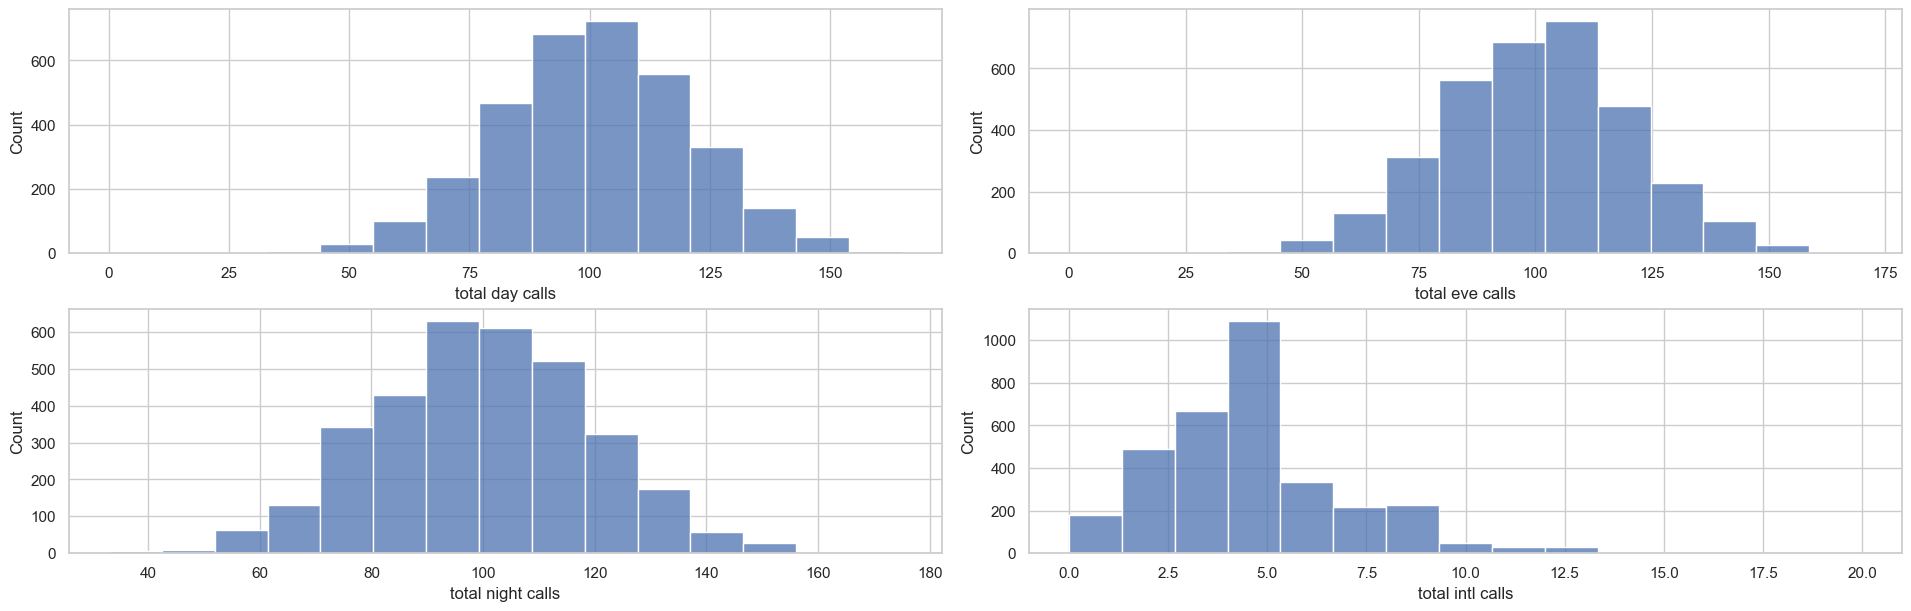

In [20]:
# Convert inf values to NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Create subplots
f, ax = plt.subplots(2, 2, figsize=(19, 6), constrained_layout=True)

# Plot histograms
sns.histplot(df["total day calls"], bins=15, ax=ax[0, 0])
sns.histplot(df["total eve calls"], bins=15, ax=ax[0, 1])
sns.histplot(df["total night calls"], bins=15, ax=ax[1, 0])
sns.histplot(df["total intl calls"], bins=15, ax=ax[1, 1])

# Show the plot
plt.show()

### Relationship Between Churn Rate And Customer Service Calls

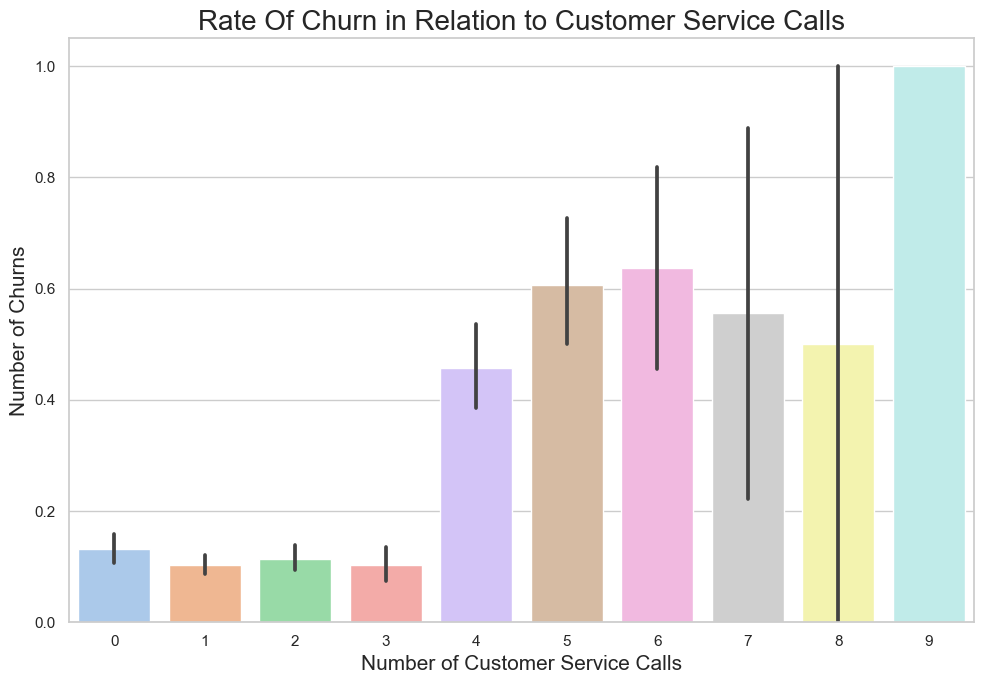

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=df, x='customer service calls', y='churn', palette="pastel", ax=ax)
plt.title('Rate Of Churn in Relation to Customer Service Calls', fontsize=20)
plt.ylabel('Number of Churns', fontsize=15) 
plt.xlabel('Number of Customer Service Calls', fontsize=15)
plt.tight_layout()
plt.show()

We can see from the above barplot that customers who tend to churn make alot of customer service calls.

### One-Hot Encoding Categorical Columns

In [22]:
encoded_df =pd.get_dummies(df,columns=['international plan','voice mail plan','state'])
encoded_df.head()

,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,...,False,False,False,False,False,False,False,False,False,False
1,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,...,False,False,False,False,False,False,False,False,False,False
2,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,...,False,False,False,False,False,False,False,False,False,False
3,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,...,False,False,False,False,False,False,False,False,False,False
4,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,...,False,False,False,False,False,False,False,False,False,False


In [23]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   total day minutes       3333 non-null   float64
 2   total day calls         3333 non-null   int64  
 3   total day charge        3333 non-null   float64
 4   total eve minutes       3333 non-null   float64
 5   total eve calls         3333 non-null   int64  
 6   total eve charge        3333 non-null   float64
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total night charge      3333 non-null   float64
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  total intl charge       3333 non-null   float64
 13  customer service calls  3333 non-null   int64  
 14  churn                   3333 non-null   

## Modelling

### Logistic Regression Model

In [24]:
#Split your dependent and independent variables
X = encoded_df.drop('churn',axis=1)
y = encoded_df['churn']


In [25]:
#Perform train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Baseline Model

In [27]:
np.bincount(y_test)

array([709, 125], dtype=int64)

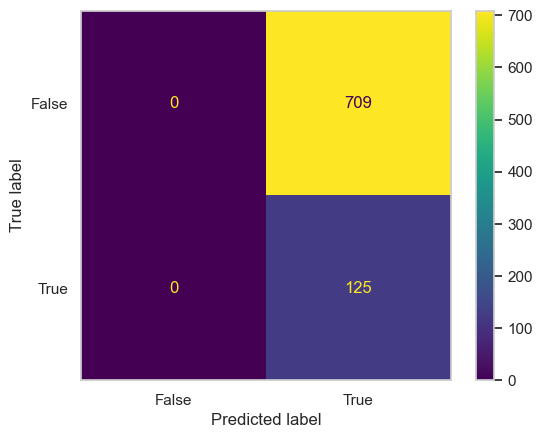

In [28]:
#Generate confusion matrix
ConfusionMatrixDisplay.from_estimator(estimator=DummyClassifier(strategy='constant', constant=1).fit(X_train, y_train),
                                       X=X_test, y=y_test);

# Plot the confusion matrix without lines
plt.grid(False)
plt.show()

#### Fitted Model

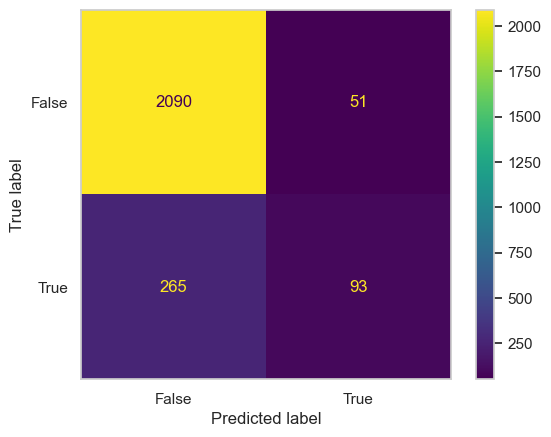

In [29]:
# Instantiate the model
model = LogisticRegression(random_state=42)

# Fit the model on the scaled data
model.fit(X_train_scaled,y_train)
#Generate confusion matrix
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_train_scaled, y=y_train);

# Plot the confusion matrix without lines
plt.grid(False)
plt.show()



In [30]:
cv_scores = cross_val_score(model,X_train_scaled,y_train,cv=5)
cv_scores

array([0.87      , 0.888     , 0.85      , 0.85      , 0.86773547])

#### Evaluation

In [31]:
y_pred = model.predict(X_test_scaled)
#baseline model
baseline_accuracy = 125/(125+709)
baseline_recall = 125/(125+0)
baseline_precision = 125/(125+709)
baseline_f1 = 2 * ((baseline_precision*baseline_recall)/(baseline_precision+baseline_recall))

#fitted model
model_accuracy = accuracy_score(y_pred,y_test)
model_recall = recall_score(y_pred,y_test)
model_precision = precision_score(y_pred,y_test)
model_f1 = f1_score(y_pred,y_test)

print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} Fitted Model: {model_accuracy:1.3f}
Recall
Baseline: {baseline_recall:1.3f} Fitted Model: {model_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f} Fitted Model: {model_precision:1.3f}
F1 Score
Baseline: {baseline_f1:1.3f} Fitted Model: {model_f1:1.3f}
""")


Accuracy
Baseline: 0.150 Fitted Model: 0.860
Recall
Baseline: 1.000 Fitted Model: 0.583
Precision
Baseline: 0.150 Fitted Model: 0.224
F1 Score
Baseline: 0.261 Fitted Model: 0.324



We can make some observations from the evaluation:
- The fitted logistic regression model significantly outperforms the baseline model in terms of accuracy (86% vs. 15%).
- The recall of the fitted model (58.3%) is lower than the baseline model (100%) because the baseline always predicts the positive class. However, the fitted model's recall is more meaningful as it attempts to balance true positive and false negative rates.
- The precision of the fitted model (22.4%) is higher than the baseline model (15%), indicating fewer false positives.
- The F1 score of the fitted model (0.324) is higher than the baseline model (0.261), suggesting a better balance between precision and recall.

The fitted logistic regression model provides a more balanced and realistic performance compared to the simplistic baseline model, despite having a lower recall. The increase in accuracy and F1 score indicates that the logistic regression model is better suited for making predictions on this dataset than the baseline model.However,a logistic regression model may not be the best fit for this dataset,given the low precision and f1 scores of the fitted model.There is alot of imbalance here.

## Decision Tree Classifier

In [32]:
#Instantiate your model
clf = DecisionTreeClassifier(random_state=42)
#Fit your model
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
#make predictions on test data
y_predictions = clf.predict(X_test)

### Evaluation

In [34]:
accuracy = accuracy_score(y_test,y_predictions)
recall = recall_score(y_test,y_predictions,average='macro')
precision = precision_score(y_test,y_predictions,average='macro')
f1score = f1_score(y_test,y_predictions,average='macro')

conf_matrix = confusion_matrix(y_test, y_predictions)
print('Confusion Matrix:')
print(conf_matrix)  

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1_score)

Confusion Matrix:
[[675  34]
 [ 32  93]]
Accuracy: 0.920863309352518
Recall: 0.8480225669957686
Precision: 0.843510897771442
F1 Score: <function f1_score at 0x000001707A6E6200>


We can see this model prodeuces very high accuracy and recall scores,which indicate that the model is performing well.However,this model has no precision and the f1 score also leaves alot to be desired.Let's see if we can improve the model with some hyperparameter tuning.

### Cross-Validation

In [35]:
#Cross Validation
clf_cross_validation_scores = cross_val_score(clf, X, y, cv=5)

# Calculate the mean
clf_mean_score = np.mean(clf_cross_validation_scores)

# Calculate the standard deviation
clf_std_score = np.std(clf_cross_validation_scores)

print("Cross-validation scores:", clf_cross_validation_scores)
print("Mean accuracy:", clf_mean_score)
print("Standard deviation:", clf_std_score)

Cross-validation scores: [0.90854573 0.92353823 0.91304348 0.92492492 0.92192192]
Mean accuracy: 0.9183948566257412
Standard deviation: 0.006437062722437696


The cross-validation results suggest that the model performs well and consistently across different parts of the dataset. The high mean accuracy indicates strong overall performance, and the low standard deviation suggests that this performance is stable and not overly dependent on the particular subset of data used for training and testing in each fold.

### Hyperparameter Tuning With GridSearchCV

In [36]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf2 = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_classifier = grid_search.best_estimator_
best_classifier.fit(X_train, y_train)

y_predictions_2 = best_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_predictions_2)
print("Best Accuracy:", accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9376498800959233


Hyperparameter tuning improves the model,but by an insignificant amount.The accuract of the model improves from 0.92 to 0.93.Overall,a decision tree is more suitable than a logistic regression model for this dataset. 

## Random Forest Classifier

In [37]:
randfor_clf = RandomForestClassifier(n_estimators=100,random_state=42)
randfor_clf.fit(X_train,y_train)
y_prd = randfor_clf.predict(X_test)

### Evaluation

In [38]:
accuracy = accuracy_score(y_test,y_prd)
recall = recall_score(y_test,y_prd)
precision = precision_score(y_test,y_prd)
f1score = f1_score(y_test,y_prd)

conf_matrix = confusion_matrix(y_test, y_prd)
print('Confusion Matrix:')
print(conf_matrix)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1_score)

Confusion Matrix:
[[708   1]
 [ 45  80]]
Accuracy: 0.9448441247002398
Recall: 0.64
Precision: 0.9876543209876543
F1 Score: <function f1_score at 0x000001707A6E6200>


This random forest model has performed very well,given the extremely high accuracy and precision scores.This is highly likely caused by the low number of false positives as shown by the confusion matrix.

## Feature Importance

Feature importances after filtering:
                   Feature  Importance
1        total day minutes    0.122768
3         total day charge    0.121048
13  customer service calls    0.106706
4        total eve minutes    0.058180
6         total eve charge    0.054782
12       total intl charge    0.046584
14   international plan_no    0.044175
11        total intl calls    0.043670
10      total intl minutes    0.043498
9       total night charge    0.039108
7      total night minutes    0.036742
2          total day calls    0.035335
15  international plan_yes    0.033999
8        total night calls    0.033400
0           account length    0.032556
5          total eve calls    0.031764
16      voice mail plan_no    0.016104
17     voice mail plan_yes    0.013109


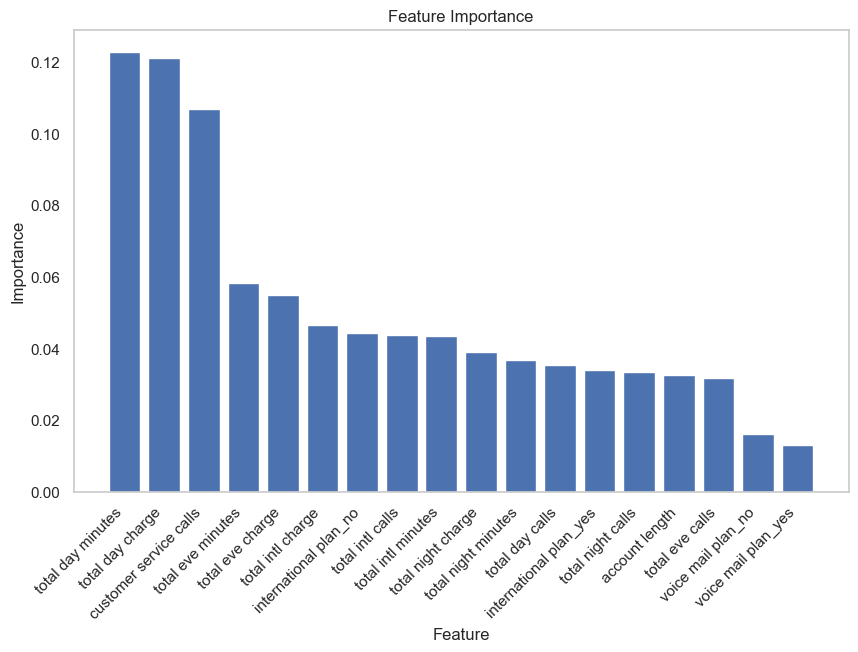

In [39]:
#Get feature importances
feature_importances = randfor_clf.feature_importances_

#Craete df
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#Remove states to make bar plot more visible
filtered_importance_df = importance_df[~importance_df['Feature'].str.startswith('state')]

print("Feature importances after filtering:")
print(filtered_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(filtered_importance_df['Feature'], filtered_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45,ha='right')
plt.grid(False)
plt.show()

## Conclusion

We can now conclude that a random forest model provides better insights into this dataset than a decision tree or a logistic regression model,even without tuned hyperparameters.The feature importance bar graph shows that total day minutes,total day charge and customer service calls are the features which influence whether customers churn or not.

## Recommendations

- Imporve their products' reliability to reduce the number of customer service calls.Once customers call 4/5 times plus,they are likely to churn.
- Promote their products more aggressively in the states of New Jersey,Texas,Maryland,Michigan and New York.A huge number of their churned customers reside in these states.
- Reduce their charges for international calls.Not many of the customers have an international plan.
- Provide discounts on charges for day calls as it influences whether customers churn or not significantly.